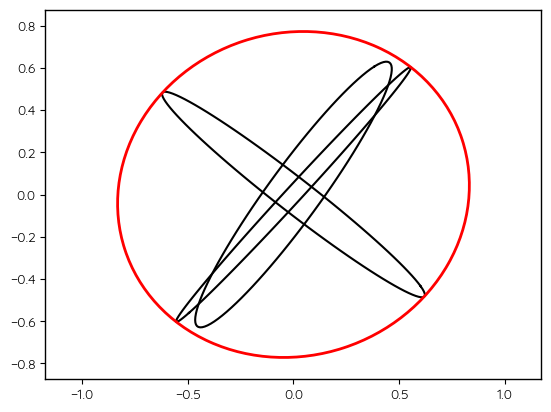

Smallest common beam: Maj: 1.679332675065063 Min: 1.527962659497242 PosA: -71.92264610806853


In [1]:
import graph_generator as gg
import stack_images as stack
import matplotlib.pyplot as plt
import glob

#import files
fits_images=glob.glob("ExampleData/0506+056_MOJAVE/*.fits") #list of filenames to .fits files
uvf_files=glob.glob("ExampleData/0506+056_MOJAVE/*.uvf") #list of filenames to .uvf files

#find smallest common beam and also plot it (takes some time to calculate)
bmaj,bmin,posa=stack.get_common_beam(fits_images,plot_beams=True)
plt.show()

print("Smallest common beam: Maj:", bmaj,"Min:", bmin,"PosA:", posa)

#NOTE: IF this is not accurate or takes to long you can adjust 
#"ppe" (sample points per ellipse) and "tolerance" parameters in get common beam

Convolution complete!


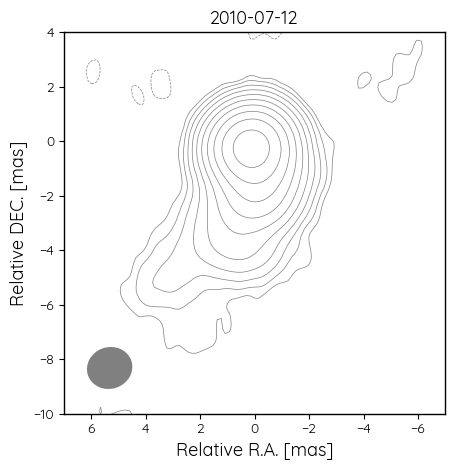

In [2]:
#fold all images with a common beam (requires DIFMAP)

#first define your DIFMAP path (where your DIFMAP executable is located, you can find it with "which difmap")
difmap_path="/usr/local/difmap/uvf_difmap_2.5g/"

#we don't have .mod files but need them for restoring images, so lets create some from the cleaned .fits files
#we will store them to "ExampleData/0506+056_MOJAVE/"

mod_files=[]
for file in fits_images:
    model=gg.getComponentInfo(file)
    filename="ExampleData/0506+056_MOJAVE/"+file.split("/")[-1].replace(".icn.fits.","")+".mod"
    mod_files.append(filename)
    gg.write_mod_file(model,writepath=filename,freq=gg.ImageData(file).freq)

#ALTERNATIVELY just use .mod files from DIFMAP like so:
#mod_files=[list of your modfiles]    

#here comes the stacking, we use use_common_beam=True to convolve with the smallest common beam
stack.fold_with_beam(fits_images,
                     difmap_path,
                     use_common_beam=True,
                     output_dir="ExampleData/0506+056_MOJAVE/convolution/", #this is where the new images will be stored
                     mod_files=mod_files,
                     uvf_files=uvf_files)
plt.close()

#lets plot one to see what it looks like
convolved_fits=glob.glob("ExampleData/0506+056_MOJAVE/convolution/*.fits")
image=gg.ImageData(convolved_fits[0])
gg.FitsImage(image,xlim=[7,-7],ylim=[-10,4])
plt.show()

Convolution complete!


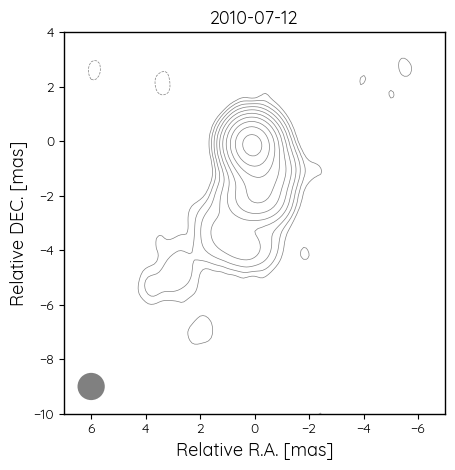

In [3]:
#we can also fold them with a custom beam that we can freely choose, let's use a circular beam as an example here
stack.fold_with_beam(fits_images,
                     difmap_path,
                     bmaj=1, #in mas
                     bmin=1, #in mas
                     posa=0, #in deg
                     output_dir="ExampleData/0506+056_MOJAVE/convolution_circ/", #this is where the new images will be stored
                     mod_files=mod_files,
                     uvf_files=uvf_files)

#lets plot one to see what it looks like
convolved_circ_fits=glob.glob("ExampleData/0506+056_MOJAVE/convolution_circ/*.fits")
image=gg.ImageData(convolved_circ_fits[0])
gg.FitsImage(image,xlim=[7,-7],ylim=[-10,4])
plt.show()

Warning! Only Stokes I input given!
-> will produce only Stokes I stacked image


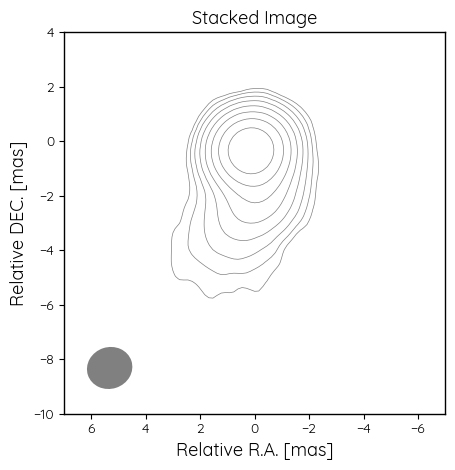

In [5]:
#now let's start some stacking action
#we want to stack the restored images in Stokes I, this will return a 2d array of stacked values

stacked_image=stack.stack_fits(convolved_fits,
                              export_file=True, #we can also export it as a fits file for easier plotting
                              output_file="ExampleData/0506+056_MOJAVE/stacking/stacked.fits" #select where to save
                              )
#Lets plot it and look at it
data=gg.ImageData("ExampleData/0506+056_MOJAVE/stacking/stacked.fits")
plot=gg.FitsImage(data,xlim=[7,-7],ylim=[-10,4],title="Stacked Image")

In [6]:
#now let's do some polarization stacking (to do!)